# LEARNING AND MEMORY TUTORIAL
# PART II: ASSOCIATIVE MEMORY

In [2]:
# the only two python modules you will need for this tutorial are numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

### 2.1 The energy function and learning rule

Consider a Hopfield network with $N$ neurons, denoted $S_i=\pm1$ for unit $i$, with dynamics

$$S_i = \text{sgn}\Big(\sum_jw_{ij}S_j\Big)$$

The synaptic weights between units $i$ and $j$ is denoted $w_{ij}$ and is symmetric, such that $w_{ij}=w_{ji}$, and $w_{ii} = 0$ for all $i$. The energy function for the network is defined as

$$H = -\frac{1}{2}\sum_{i=1}^N\sum_{j=1}^Nw_{ij}S_iS_j$$.

(a) Show that the dynamical update rule defined above will never increase the energy (Hint: consider an arbitrary neuron $i$ which starts in a state $S_i$, and then follows the update rule to move to a new state $S_i'$ -- calculate $H'-H$. Assume that all other neurons remain the same, i.e., $S_j' = S_j$ for $j\neq i$).

(b) A reasonable criterion for the stability of each memory pattern is that it should correspond to a low energy state of the dynamics. Consider a Hopfield network with a single memory pattern stored, denoted $\xi_i=\pm1$. We define a new energy function

$$H = -\frac{1}{2N}\Big(\sum_iS_i\xi_i\Big)^2,$$

which ensures that the energy is lowest when the network state perfectly overlaps with this memory pattern (convince yourself that this is true). Compare this expression with the energy function defined above. How should the weights be set to ensure that this is a low-energy state? What about for an arbitrary number of patterns?

### 2.2 Pattern completion (programming exercise)

Follow the code below to build a Hopfield network with 25 neurons which stores four patterns corresponding to the letters D, J, C, and M (see figure below). These patterns have been defined for you, as well as noisy versions of each one to be used as initial conditions. Set the weight matrix according to the Hebbian rule that you found in the previous section. Next, simulate the network dynamics until convergence for several noisy versions of each pattern (defined below). What do you see?

/Users/wfpodlaski/anaconda/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


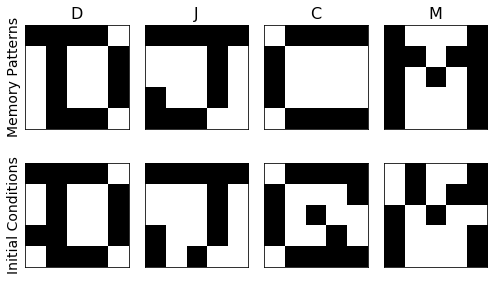

In [3]:
# INPUT PATTERNS AND NOISY VERSIONS
# (already implemented, just run this block)

N = 25
p = 4

# patterns to be stored (I)
I = np.zeros((N,p))
D = np.array([0,1,2,3,6,9,11,14,16,19,21,22,23])
J = np.array([0,1,2,3,4,8,13,15,18,20,21,22])
C = np.array([1,2,3,4,5,10,15,21,22,23,24])
M = np.array([0,4,5,6,8,9,10,12,14,15,19,20,24])
I[D,0] = 1.
I[J,1] = 1.
I[C,2] = 1.
I[M,3] = 1.
I = 2*I - 1

# noisy patterns to be used as initial states (I_start)
I_start = np.zeros((N,p))
noisy_D = np.array([0,1,2,3,6,9,11,14,15,16,19,21,22,23])
noisy_J = np.array([0,1,2,3,4,8,13,15,18,20,22])
noisy_C = np.array([1,2,3,4,5,9,10,12,15,18,21,22,23,24])
noisy_M = np.array([1,4,6,8,9,10,12,15,19,20,24])
I_start[noisy_D,0] = 1.
I_start[noisy_J,1] = 1.
I_start[noisy_C,2] = 1.
I_start[noisy_M,3] = 1.
I_start = 2*I_start - 1

def reshape_pattern(x):
    return np.reshape(x,(5,5))

letters = ['D','J','C','M']

f = plt.figure(figsize=(7,4))
for i in range(4):
    plt.subplot(2,4,i+1)
    plt.imshow(reshape_pattern(I[:,i]),cmap='Greys')
    plt.xticks(())
    plt.yticks(())
    plt.title(letters[i],fontsize=16)
    plt.subplot(2,4,i+5)
    plt.imshow(reshape_pattern(I_start[:,i]),cmap='Greys')
    plt.xticks(())
    plt.yticks(())
plt.subplot(2,4,1)    
plt.ylabel("Memory Patterns",fontsize=14)
plt.subplot(2,4,5)
plt.ylabel("Initial Conditions",fontsize=14)
plt.tight_layout()

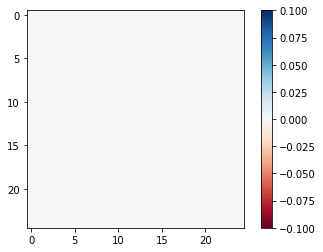

In [4]:
# STEP 1 -- DEFINE WEIGHT MATRIX
# don't forget to remove self-connections!

# implement this function which returns the weight matrix for a particular set of input patterns
def learn_weights(inpt):
    W = np.zeros((inpt.shape[0],inpt.shape[0])) # replace this line
    return W

W = learn_weights(I)
plt.imshow(W,cmap='RdBu')
plt.colorbar()

In [6]:
# STEP 2 - SIMULATE

# write a function that takes a weight matrix and initial condition and simulates the dynamics
# until convergence or until a maximum number of 50 time steps is reached
# this function should return the resulting memory state
def simulate_hopfield(W,init):
    # implement here!
    S = init
    return S

# choose one of the noisy patterns as initial state
# try out all four! (x=0 to x=3)
x=0
S0 = I_start[:,x]
S = simulate_hopfield(W,S0)

Text(0.5,1,'Final State')

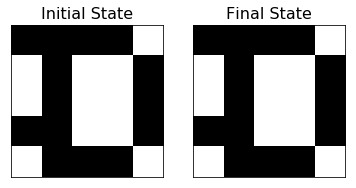

In [7]:
# PLOTTING
# (just run, already implemented)

plt.figure()
plt.subplot(1,2,1)
plt.imshow(reshape_pattern(S0),cmap='Greys')
plt.xticks(())
plt.yticks(())
plt.title("Initial State",fontsize=16)
plt.subplot(1,2,2)
plt.imshow(reshape_pattern(S),cmap='Greys')
plt.xticks(())
plt.yticks(())
plt.title("Final State",fontsize=16)

### 2.3 Estimating the memory capacity with signal-to-noise analysis

Consider a Hopfield network with $N$ units, storing a set of $p$ patterns using the Hebbian learning rule $w_{ij} = \frac{1}{N}\sum_{\mu=1}^p\xi_i^\mu\xi_j^\mu$. We'd like to know how many patterns we can store in this network such that each one is a stable fixed point of the dynamics. There are many ways to do this, but here's one simple criterion: if all of the memory patterns are stable, then when the network is sitting in a memory state, it should stay there. In other words, all of the neurons that are currently active should remain active, and all of the neurons that are currently inactive should remain inactive.

To make this a bit more quantitative, let's consider the input to an arbitrary unit $i$ when the network is sitting in one of the memory states, say for pattern $1$. This input is defined as: $h_i^1 = \sum_{j=1}^Nw_{ij}S_j$. If we are around a memory state $1$, then we want our unit $i$ to remain in the correct state $\xi_i^1$. Therefore, we need the following inequalities to hold:

$$ \begin{cases}
h_i^1 > 0 &\text{for } \xi_i^1 = +1,\\
h_i^1 < 0 &\text{for } \xi_i^1 = -1.
\end{cases} $$

If we ensure that the probability of this input flipping sign is low, then we can be reasonably sure that our memories are stable! Let's now use this simple idea to estimate the memory capacity of the standard Hopfield network.

a) We now define a quantity $C_i^1 := \xi_i^1h_i^1$, which is simply the input to unit $i$ at pattern $1$ multiplied by the desired pattern state of unit $i$ for pattern $1$. Before we do any calculations, let's try to understand what this quantity $C_i^1$ means. It is simple to see that using $C_i^1$ instead of $h_i^1$ reduces the two inequalities defined above to a single one: $C_i^1 > 0$ (convince yourself that this is true!). Based on this, we can define a probability of making an error as:

$$P_{\text{err}} = \Pr(C_i^1 < 0)$$

b) Simplify the expression for $C_i^1$ such that it only depends upon the input patterns (i.e., only terms with $\xi_i^\mu$ ; Hint: (i) use the definition of the Hebbian learning rule for $w_{ij}$, and (ii) use the fact that the network is in memory state $1$, so $S_i = \xi_i^1$).

c) Simplify the resulting equation further by pulling out part of the sum -- all terms for $\mu=1$. You should now have two terms, with the first being a single scalar number (the signal), and the second term depending on the other patterns (the noise, often called crosstalk). If the patterns are chosen randomly as $\pm1$ with equal probability, what distribution will the second term resemble? (Hint: it is a sum of a finite number of binary terms, or trials) Can we approximate it by an even simpler distribution? (Hint: Gaussian)

d) If we define an arbitrary cutoff $P_{\text{err}} < 0.01$, how many memories can be stored in the network? (Hints: (i) you should get something that scales with the network size $N$; (ii) since we are dealing with a Gaussian distribution, consider using the error function).

### 2.4 Test memory capacity of Hopfield network

The analytical result found in the previous question involved several assumptions and shortcuts. Let's test it out by simulating Hopfield networks storing different numbers of patterns and then testing how stable the memories are. In order to test the stability of a memory, one simple way is to initialize the network in the memory state and simulate the dynamics until convergence (or until a maximum number of iterations is reached). If the network is still at or close to the same memory state, then we can be reasonably sure that the memory is stable enough. In order to measure how close the network is to a memory state, we will use a criterion called overlap, defined as

$$m^\mu = \frac{1}{N}\sum_{i=1}^N S_i\xi_i^\mu$$

for pattern $\mu$. The overlap is bounded between $-1$ and $1$, with $1$ meaning that the network is sitting at the memory, and $0$ meaning that it is uncorrelated with the memory. If we simulate the network starting at each memory, and the average overlap after simulation is close to $1$, then we can assume that all of the patterns are reasonably stable.

You will simulate this test below in three steps. First, you will need to write a function which takes a weight matrix, initial state, and memory pattern, and returns the resulting overlap of the memory state following simulation of the dynamics. Use the function that you wrote before for the pattern completion question. Next, you will need to write a function that takes in all memory patterns, and simulates each of them, returining the average overlap. You should call the function overlap in this one. Finally, loop through different numbers of patterns and call the avgoverlap function for different numbers of trials. Plot the results.

In [8]:
### Step 1 -- write a function that takes a weight matrix, initial condition and memory pattern and returns
# the overlap of the network state with that pattern following simulation
# use your previous code (perhaps the simulate_hopfield function)!

def overlap(W,init,I):
    # implement here!
    return 0.

### Step 2 -- write a function that gets average overlap for all patterns given a weight matrix and a set
# of patterns, and returns the mean overlap across all patterns
# again, use previous code (use the overlap function that you just wrote)

def avg_overlap(W,Imat):
    # implement here!
    return 0.

def generate_random_patterns(N,p):
    I = np.random.binomial(1,0.5,(N,p))
    return 2*I - 1

### Step 3 -- iterate over different numbers of patterns and measure the average overlap over 10 trials for each
# use the functions above -- avg_overlap, generate_random_patterns and learn_weights

N = 200
ntrials = 10
p_vals = range(1,40)
overlap_mat = np.zeros((len(p_vals),ntrials))
for i in range(len(p_vals)):
    for j in range(ntrials):
        # implement here! -- generate patterns, learn weights, and compute overlap
        pass


Text(0.5,0,'Number of stored patterns')

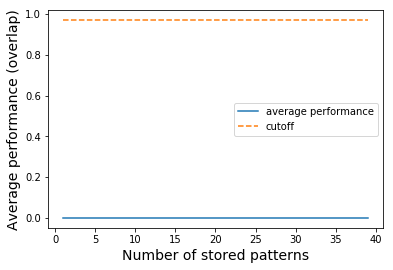

In [9]:
plt.figure()
plt.plot(p_vals,np.mean(overlap_mat,axis=1))
plt.plot(p_vals,0.97*np.ones((len(p_vals))),'--')
plt.legend(('average performance','cutoff'))
plt.ylabel('Average performance (overlap)',fontsize=14)
plt.xlabel('Number of stored patterns',fontsize=14)

### 2.5 Incremental learning and forgetting (programming exercise)

Up to now, we have assumed that a network can be trained with all patterns at once, and the weight matrix is set before simulation. However, in biology, memories are often learned incrementally over time. This poses a problem, however, because it means that the weight matrix needs to grow unbounded over time.

In this exercise you will simulate an incremental learning paradigm, in which a Hopfield network is trained with patterns slowly over time, and the weights are bounded between different values. The weight matrix should begin at zero, and should be updated according to

$$w_{ij}^\text{new} = w_{ij}^\text{old} + \eta\xi_i^\mu\xi_j^\mu,$$

with $w_{ij} \in [-A,A]$. Implement this below for a network of size $200$ with $90$ patterns trained over time. Observe what happens when the network is tested at a different number of patterns. Play around with the value of $A$. How does this affect performance?

Text(0.5,0,'Pattern number (learned in order)')

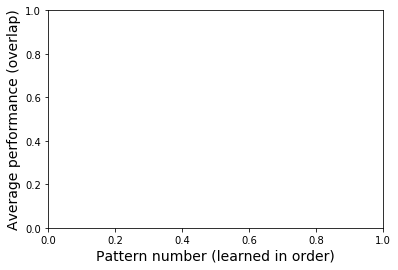

In [11]:
N = 200

# STEP 1 -- implement update weights function
# the function receives the current weight W, the bound value A, the learning rate eta, and the new input I
def update_weights(W,A,eta,I):
    return W

# STEP 2 -- simulate a series of patterns
# plot the performance intermittently after 20,40,60, and 80 patterns have been stored
W = np.zeros((N,N))
max_pats = 90
Imat = generate_random_patterns(N,max_pats)
eta = 1./N
A = 5.0*eta

plt.figure()
for i in range(max_pats):
    # implement and plot here!
    pass
plt.ylabel('Average performance (overlap)',fontsize=14)
plt.xlabel('Pattern number (learned in order)',fontsize=14)
